# GRIP TASK : 2

<strong>By: Chirodip Lodh Choudhury</strong>

# Prediction using Supervised ML
<ul>
    <li>Predict the percentage of marks of an student based on the number of study hours</li>
</ul>

### Few Imports ...

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## A Breif-Description of DataSet

#### Name of Dataset: Students.csv
#### No of rows in  Dataset: 25
#### Name of columns in Dataset: 2
#### Features in the Dataset: ['Hours', 'Scores']
#### Independent Variable: Hours
#### Dependent Variable(to be Predicted): Scores
#### Kind Of Task: Simple Linear Regression
#### No of Null /NA values:[0 0]

In [3]:
data=pd.read_csv('Students.csv')

## Explanatory Data Analysis

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Some Statistics Explaning our Dristibution of Data

The dataFrame.describe() method is one of the overused and favourite function during <b>EDA</b>.<br>
This method simply returns various Statictical measures like <b>mean ,median,quantiles,min,max,count of rows</b> etc...

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### ScatterPlots

#### A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. <br>The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Clearly from the below Plot we can conclude that there is a <strong>positive co-relation</strong> between the Feature and Target , also we don't have any <strong>outliers</strong> in our data set , So that's a very good thing!

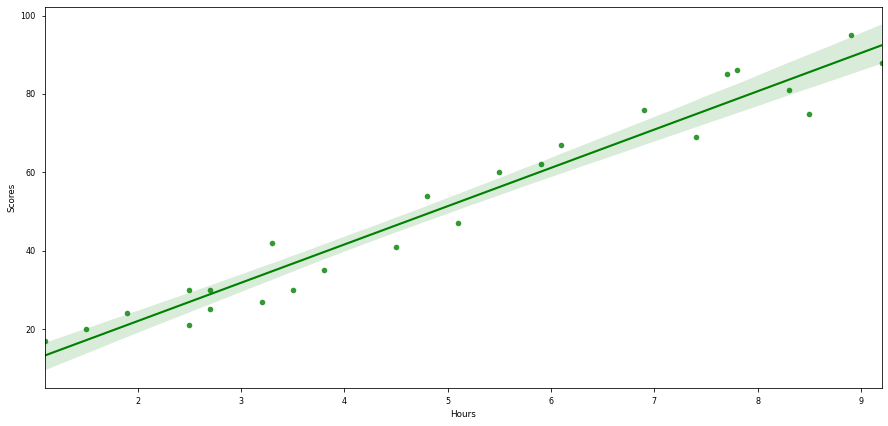

In [6]:
plt.figure(figsize=(15,7))
sb.regplot(data.Hours,data.Scores,color='Green',)
plt.show()

### HistoGrams

Here we have ploted the <strong>histogram</strong> for the both columns in our dataset , the following plots will help us to understand the dristibution of data.<br/>
<br>
Drisibution of data help us to Know certain Characterestics of our data like understanding the underlying assumptions of the data which in turn help to select the appropiate statistical tools to be applied.<b>So lets explore!</b>


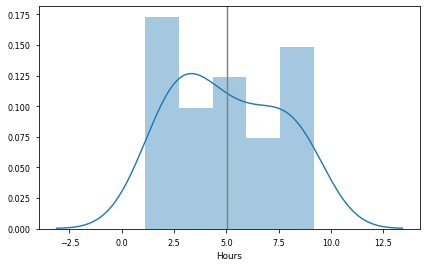

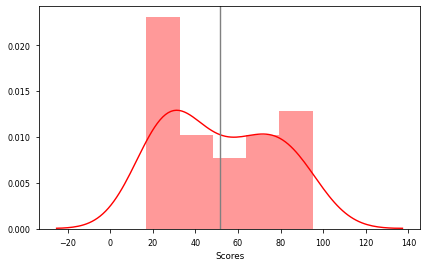

In [7]:
import math
plt.figure(figsize=(15,9))
plt.subplot(221)
sb.distplot(data.Hours,bins=math.floor(np.log2(data.shape[0])+1))
plt.axvline(np.mean(data['Hours']),color='grey')
plt.show()

plt.figure(figsize=(15,9))
plt.subplot(222)
sb.distplot(data.Scores,color='Red',bins=math.floor(np.log2(data.shape[0])+1))
plt.axvline(np.mean(data['Scores']),color='grey')
plt.show()

### Box-Plot

##### A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell if your data is symmetrical, how tightly the data is grouped, and if and how the data is skewed.


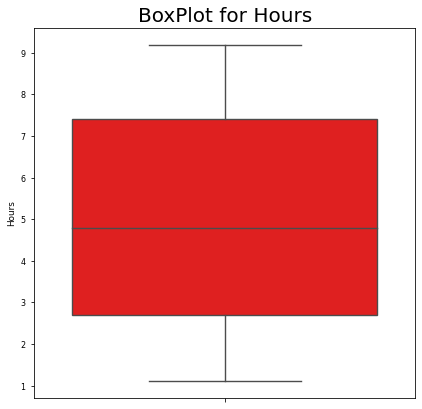

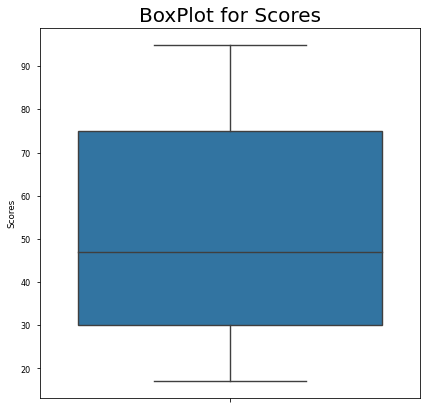

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.title("BoxPlot for Hours",fontsize=20)
sb.boxplot(data.Hours,orient="vertical",color='Red')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(222)
plt.title("BoxPlot for Scores",fontsize=20)
sb.boxplot(data.Scores,orient="vertical")
plt.show()

### CORELATION

##### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.
Here we are getting 0.98 that means our scores and hours are highly co-related and that is what we also confirmed from scatterplot .

In [9]:
# print("Name of Dataset: {}".format("Students.csv"))
# print("No of rows in  Dataset: {}".format(data.shape[0]))
# print("Name of columns in Dataset: {}".format(data.shape[1]))
# print("Features in the Dataset: {}".format(data.columns.tolist()))
# print("Independent Variable: {}".format(data.columns[0]))
# print("Dependent Variable: {}".format(data.columns[1]))
# print("Kind Of Task: {}".format("Simple Linear Regression"))
# print("No of Null /NA values:{}".format(data.isnull().sum().values))


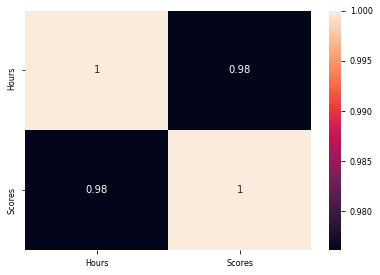

In [10]:
sb.heatmap(data.corr(),annot=True)
plt.show()

## DATA PREPARATION

In [12]:
data2=data.copy()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#lets Scale down the Values
scaler=StandardScaler()
data2['Hours']=scaler.fit_transform(np.array(data.Hours).reshape(-1,1))
data2['Scores']=scaler.fit_transform(np.array(data.Scores).reshape(-1,1))

#lets split in 80-20 ratio
x_train,x_test,y_train,y_test=train_test_split(data2['Hours'],data2['Scores'],test_size=0.2,random_state=17)

In [14]:
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

# Simple Linear Regression

#####  Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

##### A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). 

In [15]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

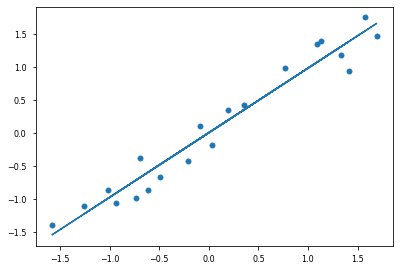

In [16]:
# Plotting the regression line
line = linear_reg.coef_*x_train+linear_reg.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train)
plt.plot(x_train, line);
plt.show()

In [17]:
pred=linear_reg.predict(x_test)

In [18]:
results=pd.DataFrame()
results['Hours']=scaler.inverse_transform(np.array(x_test).reshape(-1,))
results['Actual']=scaler.inverse_transform(np.array(y_test).reshape(-1,))
results['Predicted']=scaler.inverse_transform(np.array(pred).reshape(-1,))

In [19]:
results

,Hours,Actual,Predicted
0,28.327087,30.0,28.903996
1,26.324240,21.0,26.939534
2,62.375489,67.0,62.299852
3,75.393995,69.0,75.068856
4,16.310004,20.0,17.117224


In [20]:
print("The Model Score is :{}%".format(round(linear_reg.score(x_test,y_test)*100),2))

The Model Score is :96.0%


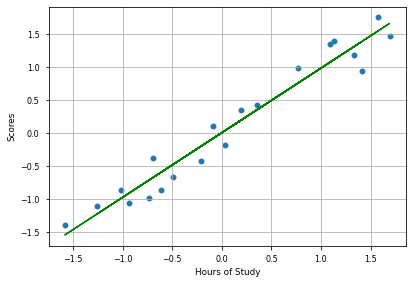

In [48]:
fit_line=linear_reg.coef_*(x_train)+linear_reg.intercept_

plt.scatter(x_train, y_train)
plt.plot(x_train, fit_line,color="Green");
plt.grid()
plt.xlabel("Hours of Study")
plt.ylabel("Scores")
plt.show()


### METRICS

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred)) 

Mean Absolute Error: 0.16699489492670067


In [36]:
from sklearn import metrics  
print(' Root Mean Square Error:', np.sqrt(metrics.mean_absolute_error(y_test, pred)))

 Root Mean Square Error: 0.4086500886170229


In [37]:
from sklearn import metrics  
print('R-Squared Error:', metrics.r2_score(y_test, pred)) 

R-Squared Error: 0.9571650035263992
